In [1]:
import os
# import sys

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator


In [2]:
home = os.getcwd()

try:
    os.mkdir('visualizations/')
except FileExistsError:
    print(f'Directory already Exists')
    print(f'')

    
    # collect inputs on the start and stop year for data visualizations,
    # and if use wants the files to be saved
save = input('Save Graphs as PNG y or n? ')
print()
start_year = input('Enter starting year for data visualizations. ').strip()
print()
end_year = input('Enter ending year for data visualizations. ').strip()


start_year = int(start_year)
end_year = int(end_year)


Directory already Exists

Save Graphs as PNG y or n? n

Enter starting year for data visualizations. 2014

Enter ending year for data visualizations. 2022


In [3]:
def files_to_lists(file_folder):
    '''    finds files in folder specified by directory

           return list of file_names and list of file_paths respectively

       :param: file_folder - dtype:string -  the name / file path from current working directory to directory for
       collecting filenames/filepaths

       :return: separate lists of both file_name and file_path

    '''
    # assign directory
    directory = f'compiled_data/{file_folder}'
    file_name_list = []
    file_path_list = []

    # iterate over files in
    # that directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(file_path):
            # if true: drop file name and path into list as string
            file_name_list.append(filename)
            file_path_list.append(file_path) 
    return file_name_list, file_path_list


In [4]:
def week_to_year_dataframes():
    '''
    navigates to the 'compiled_data' folder made using worksheets_to_df() in weekly_to_yearly_data_compiler.ipynb
    
    makes a list of all files in the folder then converts the folder names to integers, dropping the names that cannot
    be converted.
    
    this is to filter out all folders that dont correspond to a year, as the week_yo_year CSVs are saved in folders 
    names after the year they were compiled from.
    
    after making the list of files in the directory, the list is passed to files_to_lists() and two dicts are returned.
    one will full file paths, one with the name of the file.
    
    full file path is used in pd.read_csv to generate a dataframe
    
    the file_path is sliced and used to make a key == the file name in the return dictionary so that the file can be 
    found based on name
    
    return_dict[f'{year}'][f'{file_name}'] = dataframe
    '''
    
    directory = os.getcwd()
    directory_file_list = os.listdir(f'{directory}/compiled_data/')

    # this will remove all names from the list than cannot be made into a number
    # while also converting all strings into integers
    for i,name in enumerate(directory_file_list):
        try:
            directory_file_list[i] = int(name)
        except ValueError:
            directory_file_list.remove(name)
            continue

    # create a dictionary to hold all file names and paths separated by the year
    master_file_dict = {}
    master_path_dict = {}
    # start_year, end_year = take_input()
    for folder in directory_file_list:
        file_name_list, file_path_list = files_to_lists(f'{folder}/')
        master_file_dict[f'{folder}'] = file_name_list
        master_path_dict[f'{folder}'] = file_path_list


    # create a dictionary of all dataframes with keys for year then individual dataframes from the years.
    week_to_year_dataframes = {}
    for year in range(start_year, end_year+1):
        week_to_year_dataframes[f'{year}'] = {} 
        for i,file_path in enumerate(master_path_dict[f'{year}']):
            dataframe = pd.read_csv(file_path)
            string_slice = master_path_dict[f'{year}'][i][24:-4]
            week_to_year_dataframes[f'{year}'][f'{string_slice}'] = dataframe  
    return week_to_year_dataframes


In [5]:
def all_years_data_dictionary():
    '''
    the all_years_sales_data folder is navigated to and a list is made of all files within.
    
    the list is iterated through and a full file path is generated 
    
    the file is checked to see if it is actually a file.
    
    if true, file is read using pd.read_csv(), then stored in a dictionary using the sliced file name as a key
    
    dictionary containing all files read as dataframes is returned
    
    '''

    current_directory = os.getcwd()
    directory_file_list = os.listdir(f'{current_directory}\\compiled_data\\all_years_sales_data\\')

    all_years_data_dictionary = {}
    for file in directory_file_list:
        file_path = f'{current_directory}\\compiled_data\\all_years_sales_data\\{file}'

        if os.path.isfile(file_path):
            file_name = file[:-4]
            dataframe = pd.read_csv(file_path)
            all_years_data_dictionary[f'{file_name}'] = dataframe
        else:
            continue

    return all_years_data_dictionary


In [6]:
all_years_data_dictionary = all_years_data_dictionary()
week_to_year_dataframes = week_to_year_dataframes()


In [7]:
title = f'Average Sales per Shift, per Year'

# for year in years
# make dataframe, add shifts AM and PM to make one entry for each
# create df from agg values, plot df
# get lines as list and aply labels to lines, then set mets data and save the plot
for year in range(start_year,end_year+1):

    df = week_to_year_dataframes[f'{year}'][f'shift_sales_summary']

    df = df.drop(columns=['Royalty Sales'])

    Wed = df['Shift - 1 Wed AM'] + df['Shift - 2 Wed PM']
    Thu = df['Shift - 3 Thu AM'] + df['Shift - 4 Thu PM']
    Fri = df['Shift - 5 Fri AM'] + df['Shift - 6 Fri PM']
    Sat = df['Shift - 7 Sat AM'] + df['Shift - 8 Sat PM']
    Sun = df['Shift - 9 Sun AM'] + df['Shift - 10 Sun PM']
    Mon = df['Shift - 11 Mon AM'] + df['Shift - 12 Mon PM']
    Tue = df['Shift - 13 Tue AM'] + df['Shift - 14 Tue PM']

    agg_values = {
        'Wed':Wed,
        'Thu':Thu,
        'Fri':Fri,
        'Sat':Sat,
        'Sun':Sun,
        'Mon':Mon,
        'Tue':Tue,
    }
    
    # create df from summed columns
    agg_df = pd.DataFrame(agg_values)
    
    # create axis from aggregated dataframe, set graph params
    ax = agg_df.mean().plot(kind='line',legend=False, figsize=(19.20,10.80))
    
    # make a list of all lines fro assigning custom labels
    lines = ax.get_lines()

# for each line, set the label as the start year + loop # to track the years
for i,line in enumerate(lines):
    line.set_label(start_year+i)
    
plt.xlabel('Day of Week')
plt.ylabel('Sales Amount USD')
plt.title(f'{title}')

plt.grid()
plt.legend()

if save == 'y':
    plt.savefig(f'visualizations/{title}.png')
    
plt.close()


# Max Sales per Shift, per Year

In [8]:
title = f'Max Sales per Shift, per Year'

# for year in years
# make dataframe, add shifts AM and PM to make one entry for each
# create df from agg values, plot df
# get lines as list and aply labels to lines, then set mets data and save the plot

for year in range(start_year,end_year+1):

    df = week_to_year_dataframes[f'{year}'][f'shift_sales_summary']

    df = df.drop(columns=['Royalty Sales'])

    Wed = df['Shift - 1 Wed AM'] + df['Shift - 2 Wed PM']
    Thu = df['Shift - 3 Thu AM'] + df['Shift - 4 Thu PM']
    Fri = df['Shift - 5 Fri AM'] + df['Shift - 6 Fri PM']
    Sat = df['Shift - 7 Sat AM'] + df['Shift - 8 Sat PM']
    Sun = df['Shift - 9 Sun AM'] + df['Shift - 10 Sun PM']
    Mon = df['Shift - 11 Mon AM'] + df['Shift - 12 Mon PM']
    Tue = df['Shift - 13 Tue AM'] + df['Shift - 14 Tue PM']

    agg_values = {
        'Wed':Wed,
        'Thu':Thu,
        'Fri':Fri,
        'Sat':Sat,
        'Sun':Sun,
        'Mon':Mon,
        'Tue':Tue,
    }

    agg_df = pd.DataFrame(agg_values)

    ax = agg_df.max().plot(kind='line',legend=False, figsize=(19.20,10.80))

    lines = ax.get_lines()

for i,line in enumerate(lines):
    line.set_label(start_year+i)

plt.xlabel('Day of Week')
plt.ylabel('Sales Amount USD')
plt.title(f'{title}')

plt.grid()
plt.legend()

if save == 'y':
    plt.savefig(f'visualizations/{title}.png')
    
plt.close()


-------------------------

# Sum of Sales per Shift, per Year

In [9]:
title = f'Sum of Sales per Shift, per Year'
# for year in years
# make dataframe, add shifts AM and PM to make one entry for each
# create df from agg values, plot df
# get lines as list and aply labels to lines, then set mets data and save the plot
for year in range(start_year,end_year+1):

    df = week_to_year_dataframes[f'{year}'][f'shift_sales_summary']

    df = df.drop(columns=['Royalty Sales'])

    Wed = df['Shift - 1 Wed AM'] + df['Shift - 2 Wed PM']
    Thu = df['Shift - 3 Thu AM'] + df['Shift - 4 Thu PM']
    Fri = df['Shift - 5 Fri AM'] + df['Shift - 6 Fri PM']
    Sat = df['Shift - 7 Sat AM'] + df['Shift - 8 Sat PM']
    Sun = df['Shift - 9 Sun AM'] + df['Shift - 10 Sun PM']
    Mon = df['Shift - 11 Mon AM'] + df['Shift - 12 Mon PM']
    Tue = df['Shift - 13 Tue AM'] + df['Shift - 14 Tue PM']

    agg_values = {
        'Wed':Wed,
        'Thu':Thu,
        'Fri':Fri,
        'Sat':Sat,
        'Sun':Sun,
        'Mon':Mon,
        'Tue':Tue,
    }

    agg_df = pd.DataFrame(agg_values)

    ax = agg_df.sum().plot(kind='line',legend=False, figsize=(19.20,10.80))

    lines = ax.get_lines()

for i,line in enumerate(lines):
    line.set_label(start_year+i)

plt.xlabel('Day of Week')
plt.ylabel('Sales Amount USD')
plt.title(f'{title}')

plt.grid()
plt.legend()
if save == 'y':
    plt.savefig(f'visualizations/{title}.png')
    
plt.close()


# Variance per Shift, per Year

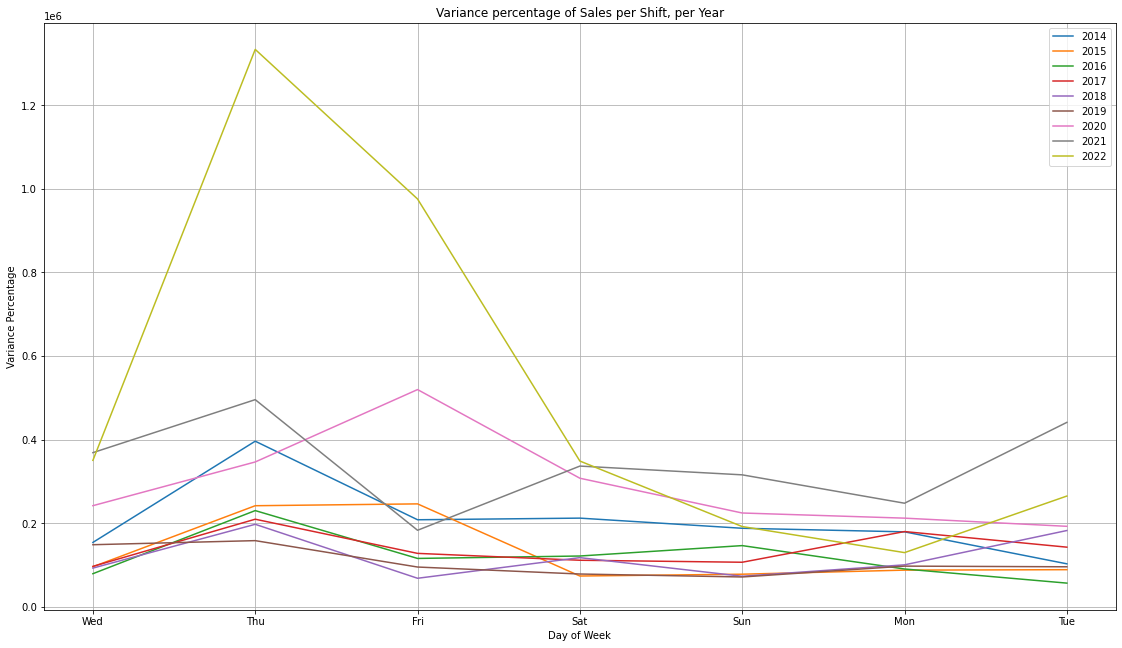

In [10]:
title = f'Variance percentage of Sales per Shift, per Year'
# for year in years
# make dataframe, add shifts AM and PM to make one entry for each
# create df from agg values, plot df
# get lines as list and aply labels to lines, then set mets data and save the plot
for year in range(start_year,end_year+1):

    df = week_to_year_dataframes[f'{year}'][f'shift_sales_summary']

    df = df.drop(columns=['Royalty Sales'])

    Wed = df['Shift - 1 Wed AM'] + df['Shift - 2 Wed PM']
    Thu = df['Shift - 3 Thu AM'] + df['Shift - 4 Thu PM']
    Fri = df['Shift - 5 Fri AM'] + df['Shift - 6 Fri PM']
    Sat = df['Shift - 7 Sat AM'] + df['Shift - 8 Sat PM']
    Sun = df['Shift - 9 Sun AM'] + df['Shift - 10 Sun PM']
    Mon = df['Shift - 11 Mon AM'] + df['Shift - 12 Mon PM']
    Tue = df['Shift - 13 Tue AM'] + df['Shift - 14 Tue PM']

    agg_values = {
        'Wed':Wed,
        'Thu':Thu,
        'Fri':Fri,
        'Sat':Sat,
        'Sun':Sun,
        'Mon':Mon,
        'Tue':Tue,
    }

    agg_df = pd.DataFrame(agg_values)

    ax = agg_df.var().plot(kind='line',legend=False, figsize=(19.20,10.80))

    lines = ax.get_lines()

for i,line in enumerate(lines):
    line.set_label(start_year+i)

plt.xlabel('Day of Week')
plt.ylabel('Variance Percentage')
plt.title(f'{title}')

plt.grid()
plt.legend()
if save == 'y':
    plt.savefig(f'visualizations/{title}.png')
    
plt.show()


# Royalty Sales per Shift, per Year

In [32]:
title = f'Royalty Sales per Shift, per Year'

# set the figure and axis
fig, ax = plt.subplots(figsize = (19.20,10.80), dpi = 200)

# for each year:
#    set the df == year, load x and y, plot, color and label before saving
for year in range(start_year,end_year+1):

    df = week_to_year_dataframes[f'{year}'][f'shift_sales_summary']
    
    y = df['Royalty Sales']
    x = df['week_ending_date']

    plt.plot(x, y)

    lines = ax.get_lines()

# after all lines are plotted,  set labels == the year through simple math
for i,line in enumerate(lines):
    line.set_label(2014+i)

# for each label not div by zero:
    # set the visibility to false so it doesnt clutter the x axis
every_nth = 12
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

# set the spacing for the grid
spacing = 505
# assign the locator to spacing value for even distribution of grid lines
minorlocator = MultipleLocator(spacing)

ax.xaxis.set_minor_locator(minorlocator)
ax.yaxis.set_minor_locator(minorlocator)

ax.grid(which='minor')

# set meta data
plt.xticks(rotation = 45)
plt.xlabel('Week of Sales')
plt.ylabel('Royalty Sales Amount USD')
plt.title(f'{title}')

plt.legend()

if save == 'y':
    plt.savefig(f'visualizations/{title}.png')
    
plt.close()
# plt.show()


#### Royalty Sales, per shift, per year - stacked

In [31]:
title = f'Royalty Sales per Shift, per Year - stacked'

# set the figure and axis
fig, ax = plt.subplots(figsize = (19.20,10.80), dpi = 200)

# for each year:
#    set the df == year, load x and y, plot, color and label before saving
for year in range(start_year,end_year+1):

    df = week_to_year_dataframes[f'{year}'][f'shift_sales_summary']
    
    y = df['Royalty Sales']
    x = list(range(0,len(df.index)))

    plt.plot(x, y)

    lines = ax.get_lines()

# after all lines are plotted,  set labels == the year through simple math
for i,line in enumerate(lines):
    line.set_label(2014+i)

# for each label not div by zero:
    # set the visibility to false so it doesnt clutter the x axis
every_nth = 12
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

# set the spacing for the grid
spacing = 505
# assign the locator to spacing value for even distribution of grid lines
minorlocator = MultipleLocator(spacing)

ax.xaxis.set_minor_locator(minorlocator)
ax.yaxis.set_minor_locator(minorlocator)

ax.grid(which='minor')

# set meta data
plt.xticks(list(range(0,53)))
plt.xlabel('Week in Year')
plt.ylabel('Royalty Sales Amount USD')
plt.title(f'{title}')

plt.legend()

if save == 'y':
    plt.savefig(f'visualizations/{title}.png')
    
plt.close()
# plt.show()

# AM/PM Sales Dispersion

In [12]:
# for each year, make a plt displaying the year of sales per shift as Blue(AM) & Red(PM).
# then save

for year in range(start_year,end_year+1):

    
    # est. figure
    fig = plt.figure(figsize = (19.20,10.80))

    df = week_to_year_dataframes[f'{year}'][f'shift_sales_summary']
    
    # royalty sales is not needed for this comparison. Drop it.
    df = df.drop(columns='Royalty Sales')

    # set columns
    cols = df.columns.to_list()
    # remove 'year' from the cols list
    cols = cols[1:]

    # for each column (14 total - 7 AM, 7 PM)
    # make a line for each AM & PM then color RED/BLUE
    
    for col in cols[::2]:
        plt.plot(df[df.columns[0]],df[col], label = 'AM_shift', color = 'b')

    for col in cols[1::2]:
        plt.plot(df[df.columns[0]],df[col], label = 'PM_shift', color = 'r')

    # Rotate the x-ticks for legibility
    plt.xticks(rotation = 45)

    # make grid
    plt.grid()
    
    # set graph meta data
    plt.xlabel('Week of Sales')
    plt.ylabel('Amount of Sales, USD')
    plt.title(f'{year} Sales Dispersion Am/Pm')
    
    # estabilish patches, 'artists' that can be called in list format using the .legend function
    blue_patch = mpatches.Patch(color='blue', label='AM Shifts')
    red_patch = mpatches.Patch(color='red', label='PM Shifts')

    plt.legend(handles=[blue_patch,red_patch])
    
    if save == 'y':
        plt.savefig(f'visualizations/{year}_Sales_Dispersion_AM_PM.png')
    
    plt.close()


# Master_promo_freebies

In [13]:
# set title
title = f'Total Promo_Freebies per Year'

# define figure and axis
fig, ax = plt.subplots(figsize = (19.20,10.80), dpi = 200)

# estabilish Dataframe information
df = all_years_data_dictionary['master_promo_freebies']

# remove dataframe 'TOTAL' and 'year:2022' Rows
df = df.iloc[:-2]

# make list of columns for setting Legend names
cols = df.columns.to_list()
#remove 'year' from column list
cols = cols[1:]

# set x values
x = df['year']
# set y values
y = df.drop(columns=['year'])

# create plot
plt.plot(x,y)

# make list of all lines for passing to legend
lines= ax.get_lines()

# for line in lines, name line after corresponding location in column list
for i,line in enumerate(lines):
    # set the name of each line
    line.set_label(cols[i])

# set labels for the axes
plt.xlabel('Year')
plt.ylabel('Amount USD')
plt.title(f'{title}')

plt.grid()

plt.legend()

if save == 'y':
    plt.savefig(f'visualizations/{title}.png')
    
plt.close()